## Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Objective
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# importing few necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# show all rows in jupyter notebook
pd. set_option('display.max_columns', None) 
pd. set_option('display.max_rows', None)

In [2]:
# import dataset from telecom_churn_data.csv file using encoding as ISO-8859-1 and seperator as ',' 

data = pd.read_csv('telecom_churn_data.csv', sep=',',encoding = "ISO-8859-1")
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
# checking shape of dataset

data.shape

(99999, 226)

In [4]:
# checking dtypes of all columns in our data

data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
# getting some statistical information of numerical columns

data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
# getting null values percentage in each column of data

round(data.isnull().sum(axis=0)*100/len(data),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

# Data Pre-processing

## Dealing with missing values

In [7]:
# storing all columns related to recharge count(2g,3g), maximum , average amt for all months (6,7,8,9)
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

data[recharge_cols].describe(include='all')

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170         1.864668         2.044699         2.016288   
std             2.516339         2.570254         2.768332         2.720132   
min             1.000000         0.000000         0.000000         0.000000   
25%             1.000000         1.000000         1.000000         1.000000   
50%             2.000000         1.000000         1.000000         1.000000   
75%             3.000000         2.000000         2.000000         2.000000   
max            84.000000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          0.659363       126.393392       126.729459       125.717301   
std           1.411513       108.477235       109.765267       109.437851   
min           0.000000         1.000000         1.000000         1.000000   
25%           0.000000        25.000000        25.000000        25.000000   
50%           0.000000       145.000000       145.000000       145.000000   
75%           1.000000       177.000000       177.000000       179.000000   
max          49.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

- In the recharge amount features as minumum amount is 1, we will impute missing values with 0's since it means customer didn't recharge that month.

In [8]:
# create a list of recharge columns where we will impute missing values with zeroes
rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [9]:
# immputing recharge columns with 0

data[rech_cols] = data[rech_cols].fillna(0)

In [10]:
# looking at first 5 rows of recharge columns after imputation

data[rech_cols].head()

total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  \
0                1.0                1.0                1.0                0.0   
1                0.0                1.0                2.0                0.0   
2                0.0                0.0                0.0                1.0   
3                0.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
0               252.0               252.0               252.0   
1                 0.0               154.0                50.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                56.0                 0.0                 0.0   

   av_rech_amt_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                 0.0            252.0            252.0            252.0   
1                 0.0              0.0            154.0             25.0   
2                46.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4                 0.0             56.0              0.0              0.0   

   max_rech_data_9  
0              0.0  
1              0.0  
2             46.0  
3              0.0  
4              0.0

In [11]:
# checking for null values in recharge columns

data[rech_cols].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
dtype: int64

In [12]:
# looking at statistical information on rechage columns

data[rech_cols].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count       99999.000000        99999.000000        99999.000000   
mean            0.632806           48.445409           51.393440   
std             1.669040          127.743863          132.629365   
min             0.000000            0.000000            0.000000   
25%             0.000000            0.000000            0.000000   
50%             0.000000            0.000000            0.000000   
75%             1.000000            8.250000           17.000000   
max            84.000000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  max_rech_data_6  \
count        99999.000000        99999.000000     99999.000000   
mean            52.027022           49.961089        31.792048   
std            131.182609          127.804280        77.248778   
min              0.000000            0.000000         0.000000   
25%              0.000000            0.000000         0.000000   
50%              0.000000            0.000000         0.000000   
75%             23.000000           17.000000         8.000000   
max           4076.000000         4061.000000      1555.000000   

       max_rech_data_7  max_rech_data_8  max_rech_data_9  
count     99999.000000     99999.000000     99999.000000  
mean         32.406314        33.113011        32.387644  
std          78.342435        78.872739        78.818696  
min           0.000000         0.000000         0.000000  
25%           0.000000         0.000000         0.000000  
50%           0.000000         0.000000         0.000000  
75%          14.000000        17.000000        17.000000  
max        1555.000000      1555.000000      1555.000000

In [13]:
# checking for null value percentage in each columns in dataset

data.isnull().sum(axis=0)*100/len(data)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [14]:
# creating list of columns which represent unique id

id_cols = ['mobile_number', 'circle_id']

# creating list of columns which represent various dates for all months

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

In [15]:
# dropping date columns & 'circle_id' as they won't be of any use in our analysis

data = data.drop(columns =  date_cols + ['circle_id'])
data.shape

(99999, 213)

In [16]:
# creating list of categorical columns and numerical columns

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in data.columns if column not in id_cols + date_cols + cat_cols]


In [17]:
# checking for null values in catergorical columns

data[cat_cols].isnull().sum()

night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_6           74846
fb_user_7           74428
fb_user_8           73660
fb_user_9           74077
dtype: int64

In [18]:
# checking categories and their counts for each categorical column

for i in cat_cols :
    print(data[i].value_counts(),"\n",'='*40)

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64 
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64 
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64 
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64 
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64 
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64 
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64 
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64 


In [19]:
# looking at statistical information of categorical columns

data[cat_cols].describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
count      25153.000000      25571.000000      26339.000000      25922.000000   
mean           0.025086          0.023034          0.020844          0.015971   
std            0.156391          0.150014          0.142863          0.125366   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

          fb_user_6     fb_user_7     fb_user_8     fb_user_9  
count  25153.000000  25571.000000  26339.000000  25922.000000  
mean       0.914404      0.908764      0.890808      0.860968  
std        0.279772      0.287950      0.311885      0.345987  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      1.000000      1.000000      1.000000  
50%        1.000000      1.000000      1.000000      1.000000  
75%        1.000000      1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000


### 2. Replace NaN values in categorical variables

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [20]:
# imputing null values in categorical columns with -1 which will represent a different category (other) 
data[cat_cols] = data[cat_cols].fillna(-1)

In [21]:
# checking for null values in categorical columns

data[cat_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [22]:
# checking categories and their counts for each categorical column


for i in cat_cols :
    print(data[i].value_counts(),"\n",'='*40)

-1.0    74846
 0.0    24522
 1.0      631
Name: night_pck_user_6, dtype: int64 
-1.0    74428
 0.0    24982
 1.0      589
Name: night_pck_user_7, dtype: int64 
-1.0    73660
 0.0    25790
 1.0      549
Name: night_pck_user_8, dtype: int64 
-1.0    74077
 0.0    25508
 1.0      414
Name: night_pck_user_9, dtype: int64 
-1.0    74846
 1.0    23000
 0.0     2153
Name: fb_user_6, dtype: int64 
-1.0    74428
 1.0    23238
 0.0     2333
Name: fb_user_7, dtype: int64 
-1.0    73660
 1.0    23463
 0.0     2876
Name: fb_user_8, dtype: int64 
-1.0    74077
 1.0    22318
 0.0     3604
Name: fb_user_9, dtype: int64 


### Dropping columns with more than 70% null values

In [23]:
# getting list of all columns that have more than 70 percentage null values

temp = data.isnull().sum()*100/len(data) > 70
drop_cols = (temp[temp == True].index)
print("No. of Columns have more than 70% Null Values : ",len(drop_cols))
drop_cols

No. of Columns have more than 70% Null Values :  16


Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')

In [24]:
# dropping columns having more than 70 percentage null values

data = data.drop(columns=drop_cols)
data.shape

(99999, 197)

In [25]:
# getting list of all columns that have null values

temp = data.isnull().sum()*100/len(data) > 0
drop_cols = (temp[temp == True].index)
len(drop_cols)

119

In [26]:
# getting percentage of rows having null values

temp = data.isnull().sum(axis=1) > 0
round(len(temp[temp == True])*100/len(data),2)

11.67

- As we can see there are 11.67% of rows that have null values. 
- We can choose to drop all rows having null values.
- But we will not drop these rows, instead we will impute them with some values

In [27]:
data.shape

(99999, 197)

In [28]:
# finding variables having >0% of null values

temp = pd.DataFrame(data.isnull().sum()/len(data)*100)
temp = temp[temp[0] > 0]
temp

0
loc_og_t2o_mou    1.018010
std_og_t2o_mou    1.018010
loc_ic_t2o_mou    1.018010
onnet_mou_6       3.937039
onnet_mou_7       3.859039
onnet_mou_8       5.378054
onnet_mou_9       7.745077
offnet_mou_6      3.937039
offnet_mou_7      3.859039
offnet_mou_8      5.378054
offnet_mou_9      7.745077
roam_ic_mou_6     3.937039
roam_ic_mou_7     3.859039
roam_ic_mou_8     5.378054
roam_ic_mou_9     7.745077
roam_og_mou_6     3.937039
roam_og_mou_7     3.859039
roam_og_mou_8     5.378054
roam_og_mou_9     7.745077
loc_og_t2t_mou_6  3.937039
loc_og_t2t_mou_7  3.859039
loc_og_t2t_mou_8  5.378054
loc_og_t2t_mou_9  7.745077
loc_og_t2m_mou_6  3.937039
loc_og_t2m_mou_7  3.859039
loc_og_t2m_mou_8  5.378054
loc_og_t2m_mou_9  7.745077
loc_og_t2f_mou_6  3.937039
loc_og_t2f_mou_7  3.859039
loc_og_t2f_mou_8  5.378054
loc_og_t2f_mou_9  7.745077
loc_og_t2c_mou_6  3.937039
loc_og_t2c_mou_7  3.859039
loc_og_t2c_mou_8  5.378054
loc_og_t2c_mou_9  7.745077
loc_og_mou_6      3.937039
loc_og_mou_7      3.859039
loc_og_mou_8      5.378054
loc_og_mou_9      7.745077
std_og_t2t_mou_6  3.937039
std_og_t2t_mou_7  3.859039
std_og_t2t_mou_8  5.378054
std_og_t2t_mou_9  7.745077
std_og_t2m_mou_6  3.937039
std_og_t2m_mou_7  3.859039
std_og_t2m_mou_8  5.378054
std_og_t2m_mou_9  7.745077
std_og_t2f_mou_6  3.937039
std_og_t2f_mou_7  3.859039
std_og_t2f_mou_8  5.378054
std_og_t2f_mou_9  7.745077
std_og_t2c_mou_6  3.937039
std_og_t2c_mou_7  3.859039
std_og_t2c_mou_8  5.378054
std_og_t2c_mou_9  7.745077
std_og_mou_6      3.937039
std_og_mou_7      3.859039
std_og_mou_8      5.378054
std_og_mou_9      7.745077
isd_og_mou_6      3.937039
isd_og_mou_7      3.859039
isd_og_mou_8      5.378054
isd_og_mou_9      7.745077
spl_og_mou_6      3.937039
spl_og_mou_7      3.859039
spl_og_mou_8      5.378054
spl_og_mou_9      7.745077
og_others_6       3.937039
og_others_7       3.859039
og_others_8       5.378054
og_others_9       7.745077
loc_ic_t2t_mou_6  3.937039
loc_ic_t2t_mou_7  3.859039
loc_ic_t2t_mou_8  5.378054
loc_ic_t2t_mou_9  7.745077
loc_ic_t2m_mou_6  3.937039
loc_ic_t2m_mou_7  3.859039
loc_ic_t2m_mou_8  5.378054
loc_ic_t2m_mou_9  7.745077
loc_ic_t2f_mou_6  3.937039
loc_ic_t2f_mou_7  3.859039
loc_ic_t2f_mou_8  5.378054
loc_ic_t2f_mou_9  7.745077
loc_ic_mou_6      3.937039
loc_ic_mou_7      3.859039
loc_ic_mou_8      5.378054
loc_ic_mou_9      7.745077
std_ic_t2t_mou_6  3.937039
std_ic_t2t_mou_7  3.859039
std_ic_t2t_mou_8  5.378054
std_ic_t2t_mou_9  7.745077
std_ic_t2m_mou_6  3.937039
std_ic_t2m_mou_7  3.859039
std_ic_t2m_mou_8  5.378054
std_ic_t2m_mou_9  7.745077
std_ic_t2f_mou_6  3.937039
std_ic_t2f_mou_7  3.859039
std_ic_t2f_mou_8  5.378054
std_ic_t2f_mou_9  7.745077
std_ic_t2o_mou_6  3.937039
std_ic_t2o_mou_7  3.859039
std_ic_t2o_mou_8  5.378054
std_ic_t2o_mou_9  7.745077
std_ic_mou_6      3.937039
std_ic_mou_7      3.859039
std_ic_mou_8      5.378054
std_ic_mou_9      7.745077
spl_ic_mou_6      3.937039
spl_ic_mou_7      3.859039
spl_ic_mou_8      5.378054
spl_ic_mou_9      7.745077
isd_ic_mou_6      3.937039
isd_ic_mou_7      3.859039
isd_ic_mou_8      5.378054
isd_ic_mou_9      7.745077
ic_others_6       3.937039
ic_others_7       3.859039
ic_others_8       5.378054
ic_others_9       7.745077

In [29]:
# storing list of columns having null values in columns_list variable

column_list = list(temp[0].index)
column_list[:5]

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7']

In [30]:
# checking datatype of all columns in columns_list

data[column_list].dtypes

loc_og_t2o_mou      float64
std_og_t2o_mou      float64
loc_ic_t2o_mou      float64
onnet_mou_6         float64
onnet_mou_7         float64
onnet_mou_8         float64
onnet_mou_9         float64
offnet_mou_6        float64
offnet_mou_7        float64
offnet_mou_8        float64
offnet_mou_9        float64
roam_ic_mou_6       float64
roam_ic_mou_7       float64
roam_ic_mou_8       float64
roam_ic_mou_9       float64
roam_og_mou_6       float64
roam_og_mou_7       float64
roam_og_mou_8       float64
roam_og_mou_9       float64
loc_og_t2t_mou_6    float64
loc_og_t2t_mou_7    float64
loc_og_t2t_mou_8    float64
loc_og_t2t_mou_9    float64
loc_og_t2m_mou_6    float64
loc_og_t2m_mou_7    float64
loc_og_t2m_mou_8    float64
loc_og_t2m_mou_9    float64
loc_og_t2f_mou_6    float64
loc_og_t2f_mou_7    float64
loc_og_t2f_mou_8    float64
loc_og_t2f_mou_9    float64
loc_og_t2c_mou_6    float64
loc_og_t2c_mou_7    float64
loc_og_t2c_mou_8    float64
loc_og_t2c_mou_9    float64
loc_og_mou_6        

- We can see that all these columns are having numerical data

In [31]:
# looking at first 5 rows of all columns in column_list 
data[column_list].head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
0             0.0             0.0             0.0          NaN          NaN   
1             0.0             0.0             0.0        24.11        78.68   
2             0.0             0.0             0.0        11.54        55.24   
3             0.0             0.0             0.0        99.91        54.39   
4             0.0             0.0             0.0        50.31       149.44   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00          NaN           NaN           NaN          0.00   
1         7.68        18.34         15.74         99.84        304.76   
2        37.26        74.81        143.33        220.59        208.36   
3       310.98       241.71        123.31        109.01         71.68   
4        83.89        58.78         76.96         91.88        124.26   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           NaN            NaN            NaN           0.00            NaN   
1         53.76            0.0           0.00           0.00           0.00   
2        118.91            0.0           0.00           0.00          38.49   
3        113.54            0.0          54.86          44.38           0.00   
4         45.81            0.0           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN           0.00            NaN   
1            0.0           0.00           0.00           0.00   
2            0.0           0.00           0.00          70.94   
3            0.0          28.09          39.04           0.00   
4            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68         37.99         83.

In [32]:
# checking statistical data

data[column_list].describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   onnet_mou_6  \
count         98981.0         98981.0         98981.0  96062.000000   
mean              0.0             0.0             0.0    132.395875   
std               0.0             0.0             0.0    297.207406   
min               0.0             0.0             0.0      0.000000   
25%               0.0             0.0             0.0      7.380000   
50%               0.0             0.0             0.0     34.310000   
75%               0.0             0.0             0.0    118.740000   
max               0.0             0.0             0.0   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean     133.670805    133.018098    130.302327    197.935577    197.045133   
std      308.794148    308.951589    308.477668    316.851613    325.862803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.460000      5.330000     34.730000     32.190000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
75%      115.595000    115.860000    112.130000    231.860000    226.815000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  94621.000000  92254.000000   96062.000000   96140.000000   
mean     196.574803    190.337222       9.950013       7.149898   
std      327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000       0.000000       0.000000   
25%       31.630000     27.130000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
75%      228.260000    220.505000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000         40.430000   
75%           40.110000         39.280000        110.390000        107.560000   
max        10752.560000      10389.240000       4729.740000       4557.140000   

       loc_og_t2m_mou_8

In [33]:
## imputing columns with null values with respective median of the column

for i in column_list :
    if data[i].dtype != "object" : 
        data[i] = data[i].fillna(data[i].median())


In [34]:
# looking at first 5 rows of all columns in column_list 
data[column_list].head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
0             0.0             0.0             0.0        34.31        32.33   
1             0.0             0.0             0.0        24.11        78.68   
2             0.0             0.0             0.0        11.54        55.24   
3             0.0             0.0             0.0        99.91        54.39   
4             0.0             0.0             0.0        50.31       149.44   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00        29.84         96.31        91.735          0.00   
1         7.68        18.34         15.74        99.840        304.76   
2        37.26        74.81        143.33       220.590        208.36   
3       310.98       241.71        123.31       109.010         71.68   
4        83.89        58.78         76.96        91.880        124.26   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0         87.29            0.0           0.00           0.00           0.00   
1         53.76            0.0           0.00           0.00           0.00   
2        118.91            0.0           0.00           0.00          38.49   
3        113.54            0.0          54.86          44.38           0.00   
4         45.81            0.0           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.0           0.00           0.00           0.00   
1            0.0           0.00           0.00           0.00   
2            0.0           0.00           0.00          70.94   
3            0.0          28.09          39.04           0.00   
4            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0             11.91             11.61              0.00             11.26   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0             41.03             40.43              0.00             39.12   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0              0.00              0.00              0.00   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0         65.11        63.685          0.00         61.84              0.00   
1         35.39       150.510        299.54         72.11              0.23   
2         60.66        67.410         67.66         64.81              4.34   
3        183.03       118.680         37.99         83.

In [35]:
# finding variables having >0% of null values

temp = pd.DataFrame(data.isnull().sum()/len(data)*100)
temp = temp[temp[0] > 0]
temp

Empty DataFrame
Columns: [0]
Index: []

- We do not have any columns with null values now.
- We can see that now we have imputed all null values in our dataset and hence we can now move forward with our analysis.

In [36]:
data.shape

(99999, 197)

## Churn Derievation


create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

0 - not churn, 1 - churn

In [37]:
# creating 'churn' column with the help of proposed criteria in Problem Statement

data['total_usage'] = data['total_ic_mou_9'] + data['total_ic_mou_9'] + data['vol_2g_mb_9'] + data['vol_3g_mb_9']
data['churn'] = data['total_usage'].apply(lambda x: 1 if x==0 else 0)
data['churn'].head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [38]:
# checking dataset distribution w.r.t. churn & not-churn

data.churn.value_counts()*100/len(data)

0    89.337893
1    10.662107
Name: churn, dtype: float64

- We have 10.66% churns in our dataset

In [39]:
# dropping total_usage column

data.drop(columns=['total_usage'],inplace=True)

## Filtering High-Value Customers and Creating Derived Columns


In [40]:
# calculate the total data recharge amount for June and July = number of recharges * average recharge amount
# deriving total_data_rech

data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7
data['total_data_rech_8'] = data.total_rech_data_8 * data.av_rech_amt_data_8

In [41]:
# calculate total recharge amount for June and July = call recharge amount + data recharge amount
# deriving amt_data

data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7
data['amt_data_8'] = data.total_rech_amt_8 + data.total_data_rech_8

In [42]:
# dropping all old columns as we will analyse only derived columns now

col_list = ['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7',
            'total_rech_amt_6','total_data_rech_6','total_rech_amt_7','total_data_rech_7',
           'total_rech_amt_8','total_data_rech_8','total_rech_data_8','av_rech_amt_data_8']

data.drop(columns=col_list,inplace=True)

In [43]:
# calculate average recharge done by customer in June and July

data['avg_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

In [44]:
# getting Recharge Amt at 70th Percentile

print("Recharge Amt at 70th Percentile :", data.avg_amt_data_6_7.quantile(0.7))

Recharge Amt at 70th Percentile : 478.0


In [45]:
# high value customer data filteration || where avg. recharge amount in 6th and 7th month is more than equal to 478

hvc_data = data[data.avg_amt_data_6_7 >= data.avg_amt_data_6_7.quantile(0.7)]
hvc_data.shape

(30001, 193)

In [46]:
# delete column created to filter high-value customers

hvc_data = hvc_data.drop(['avg_amt_data_6_7'], axis=1)
hvc_data.shape

(30001, 192)

- We now have 30001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

In [47]:
hvc_data.churn.value_counts()*100/len(hvc_data)

0    91.593614
1     8.406386
Name: churn, dtype: float64

- We now have 8.4% of churn customer data in our dataset

## Dropping all 9th month Columns

In [48]:
# extract all columns name that end with 9

col_9_names = hvc_data.filter(regex='9$', axis=1).columns
col_9_names

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9'],
      dtype='object')

In [49]:
# delete all columns related to 9th month

hvc_data = hvc_data.drop(columns=col_9_names)
hvc_data.shape

(30001, 145)

In [50]:
# update num_cols and cat_cols column name list

cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in hvc_data.columns if col not in cat_cols+id_cols]

### Removing features that have only one value in all the observation

In [51]:
# Check for variables which have 1 unique value only

temp = pd.DataFrame(hvc_data.nunique()).reset_index()
temp.columns=['Features','Uniques']
temp[temp['Uniques']==1]

Features  Uniques
1     loc_og_t2o_mou        1
2     std_og_t2o_mou        1
3     loc_ic_t2o_mou        1
43  std_og_t2c_mou_6        1
44  std_og_t2c_mou_7        1
45  std_og_t2c_mou_8        1
82  std_ic_t2o_mou_6        1
83  std_ic_t2o_mou_7        1
84  std_ic_t2o_mou_8        1

In [52]:
# dropping columns that have only one unique value as they won't be of any use in our analysis

drop_cols = temp[temp['Uniques']==1].Features.values
hvc_data.drop(columns=drop_cols,inplace=True)

In [53]:
# update num_cols and cat_cols column name list

cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in hvc_data.columns if col not in cat_cols+id_cols]

In [54]:
hvc_data.shape

(30001, 136)

## Dealing with outliers in Dataset

In [55]:
# drop_outliers function : (data : our dataframe, cols : list of columns on which outliers are to be dropped)
# dropping outliers in each numerical columns if the value do not falls under Q1-IQR*1.5 & Q3+IQR*1.5 
# where Q1 = 0.01 quantile
#       Q3 = 0.99 quantile
#       IQR = Q3 - Q1

def drop_outliers(data,cols) :
    for col in cols :
        Q1 = data[col].quantile(0.01)
        Q3 = data[col].quantile(0.99)
        IQR = Q3 - Q1
        data = data[(data[col]>=Q1-IQR*1.5) & (data[col]<=Q3+IQR*1.5)]
    return data

In [56]:
# calling drop_outlier function

hvc_data = drop_outliers(hvc_data,num_cols)

In [57]:
hvc_data.shape

(26818, 136)

# EDA

### Ploting BOXPLOT of Numerical Features with Target Variable

In [58]:
# a function for plotting box plots for an attribute

def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = hvc_data
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

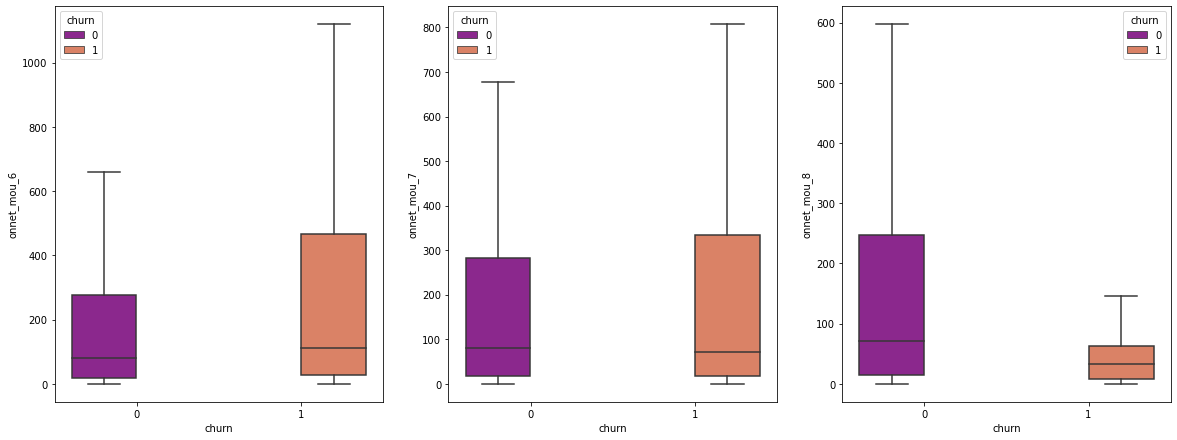

In [59]:
# ploting box plots for minutes of usage on same operator network
plot_box_chart('onnet_mou')

#### We can observe that customer who have churned has drastic reduction in 'Minutes of usage - voice calls'  the same operator network

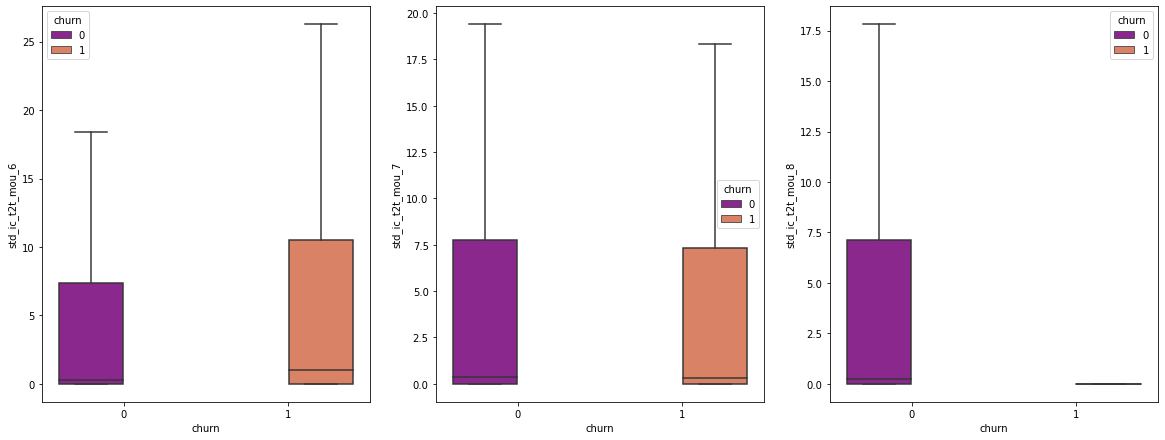

In [60]:
# ploting box plots for standard incoming calls on same telecom network
plot_box_chart('std_ic_t2t_mou')


- we can notice that minutes of incoming Standard calls from outside the calling circle within same operator (mobile to mobile) has reduce significantly to 0.
- By this we can expect that customer showing similar behaviour are more likely to churn



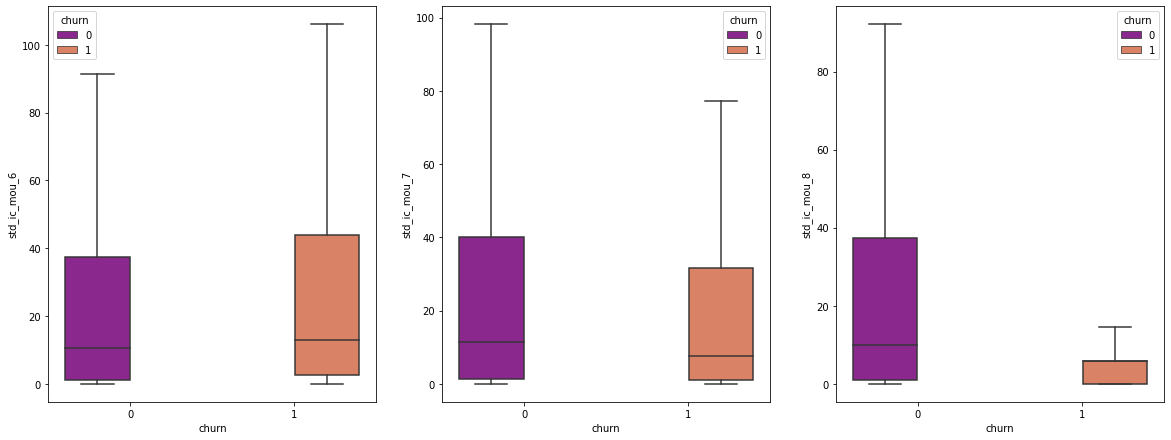

In [61]:
# ploting box plots for standard incoming minutes of usage
plot_box_chart('std_ic_mou')


- Also customer showing similar behavior as shown in before charts (minutes of incoming Standard calls from outside the calling circle has reduce significantly)
- By this we can expect that customer showing similar behaviour are more likely to churn

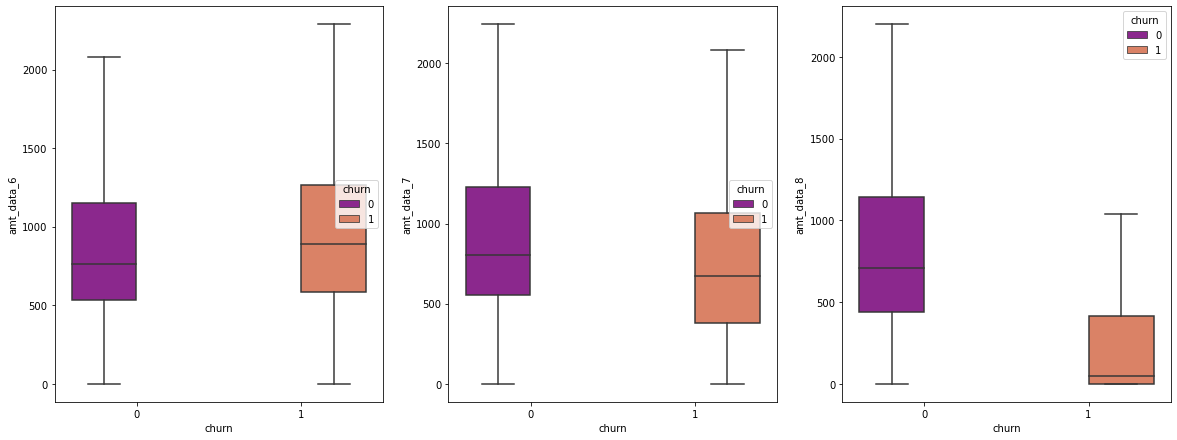

In [62]:
# ploting box plots for amount of data usage in all months (6,7,8)
plot_box_chart('amt_data')


- We can notice that those customer who have churned have decreased the amount of data usage from 6th month to 7th month to 8th month.
- THis can we seen by reduction in the median of the customer who have churned in above plots

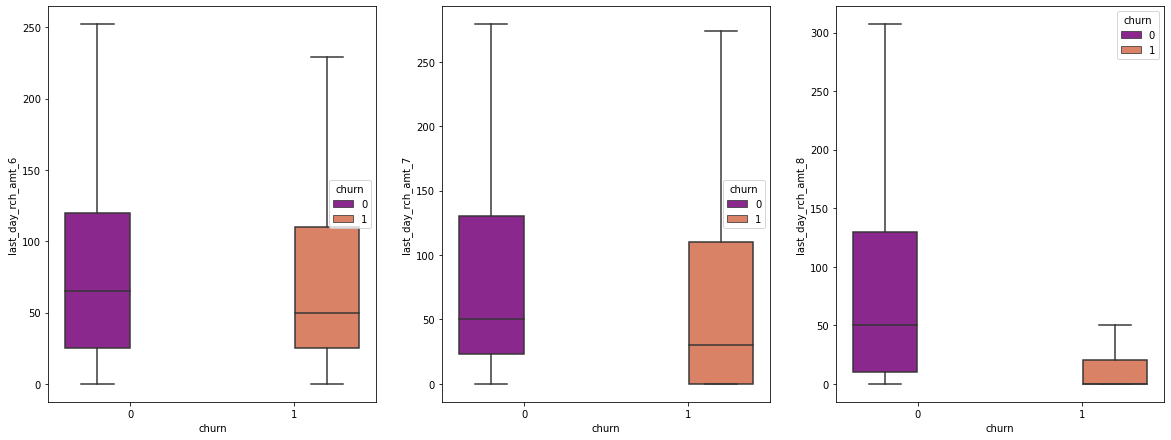

In [63]:
# ploting box plots for last day recharge amount of all months
plot_box_chart('last_day_rch_amt')


- It can be clearly seen that customer who are not churning have slowly increased their last recharge amount from july till september, on the other hand customer who have churn have significantly reduced the same from july to september

### Ploting Stacked Bar Chart of Catrgorical Variables vs. Categorical Variables

In [64]:
# a function for ploting Stacked Bar chart

def plot_stack_chart(a,b) :

    # set plot style: grey grid in the background:
    sns.set(style="darkgrid")

    # set the figure size
    plt.figure(figsize=(8, 5))

    # top bar -> sum all values(churn=No and churn=Yes) to find y position of the bars
    total = hvc_data.groupby(a)[b].sum().reset_index()

    # bar chart 1 -> top bars (group of 'churn=No')
    bar1 = sns.barplot(x=a,  y=b, data=total, color='darkblue')

    # bottom bar ->  take only churn=Yes values from the data
    churns = hvc_data[hvc_data.churn==1]

    # bar chart 2 -> bottom bars (group of 'churn=Yes')
    bar2 = sns.barplot(x=a, y=b, data=churns, estimator=sum, ci=None,  color='lightblue')

    # add legend
    top_bar = mpatches.Patch(color='darkblue', label='churn = No')
    bottom_bar = mpatches.Patch(color='lightblue', label='churn = Yes')
    plt.legend(handles=[top_bar, bottom_bar])

    # show the graph
    plt.show()

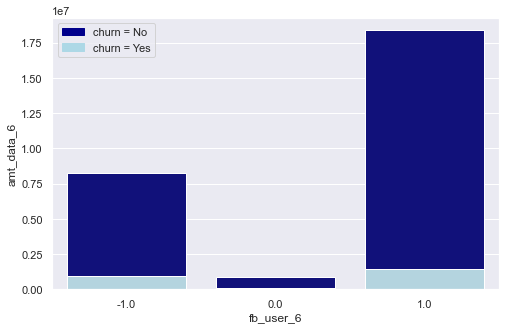

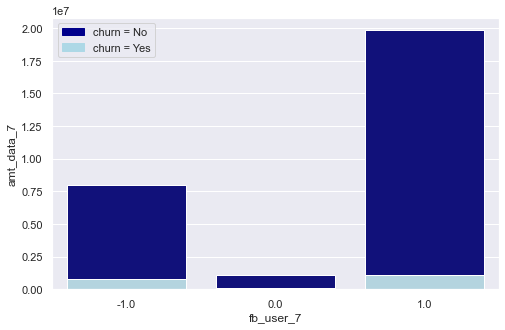

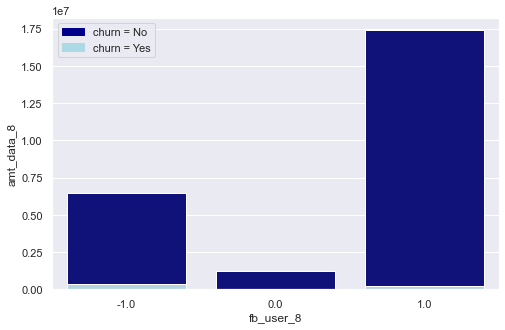

In [65]:
# plotting stacked plot for customers using fb data pack and total amount of data usage in all months

col_list = ['fb_user_6','fb_user_7','fb_user_8']
b = ['amt_data_6','amt_data_7','amt_data_8']

for i in range(len(col_list)) :
    plot_stack_chart(col_list[i],b[i])

- It can be notice that customer who are availing services of Facebook and similar social networking sites are more likely to churn than those who are not availing.

- From above 3 plots we can observe that customer who have falls under category -1 (i.e. not recharge done in that month) in september month and have consume data below 

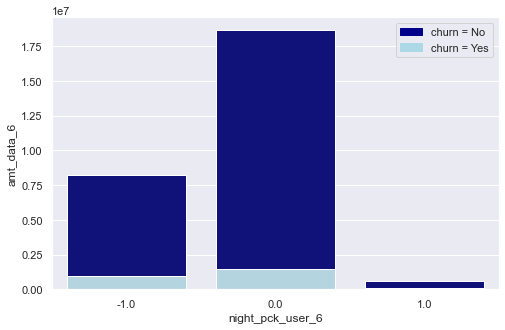

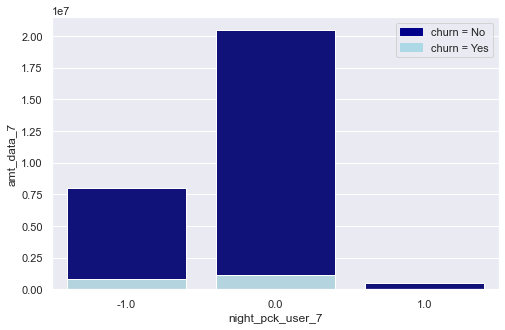

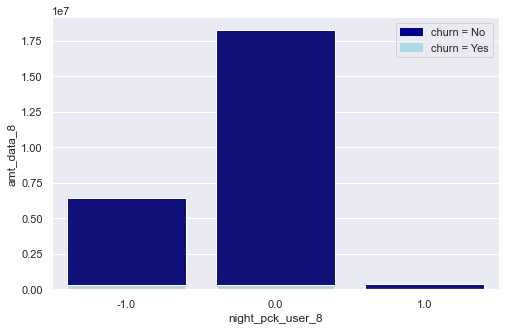

In [66]:
# plotting stacked plot for customers using night data pack and total amount of data usage in all months

col_list = ['night_pck_user_6','night_pck_user_7','night_pck_user_8']
b = ['amt_data_6','amt_data_7','amt_data_8']

for i in range(len(col_list)) :
    plot_stack_chart(col_list[i],b[i])

- It is clear from above plots that customer who do not avail services available for night are more likely to churn than those who do avail.

In [67]:
# getting columns related to outgoing calls and minutes of usage for 6th month

cols_6th = hvc_data.columns[hvc_data.columns.str.contains('.*_og_.*mou_6',regex=True)]

<AxesSubplot:>

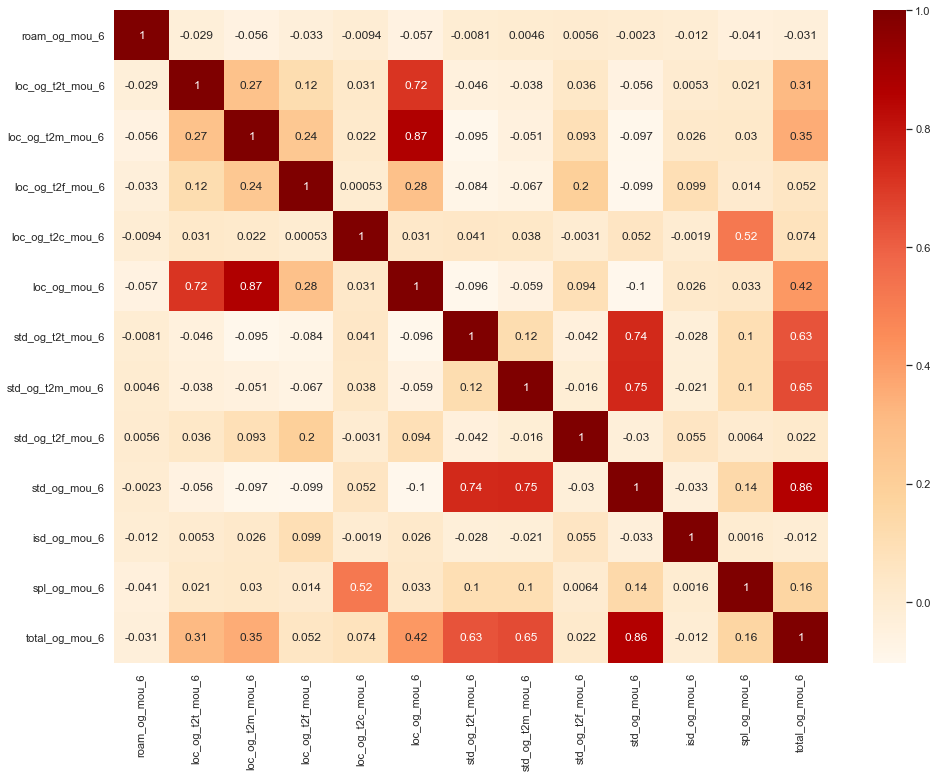

In [68]:
# plotting heatmap to compare correlation

plt.figure(figsize=(16,12))
sns.heatmap(data=hvc_data[cols_6th].corr(),cmap="OrRd",annot=True)

In [69]:
# getting a columns related to total, standard and local outgoing minutes of usage

cols_list = hvc_data.columns[hvc_data.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]

<AxesSubplot:>

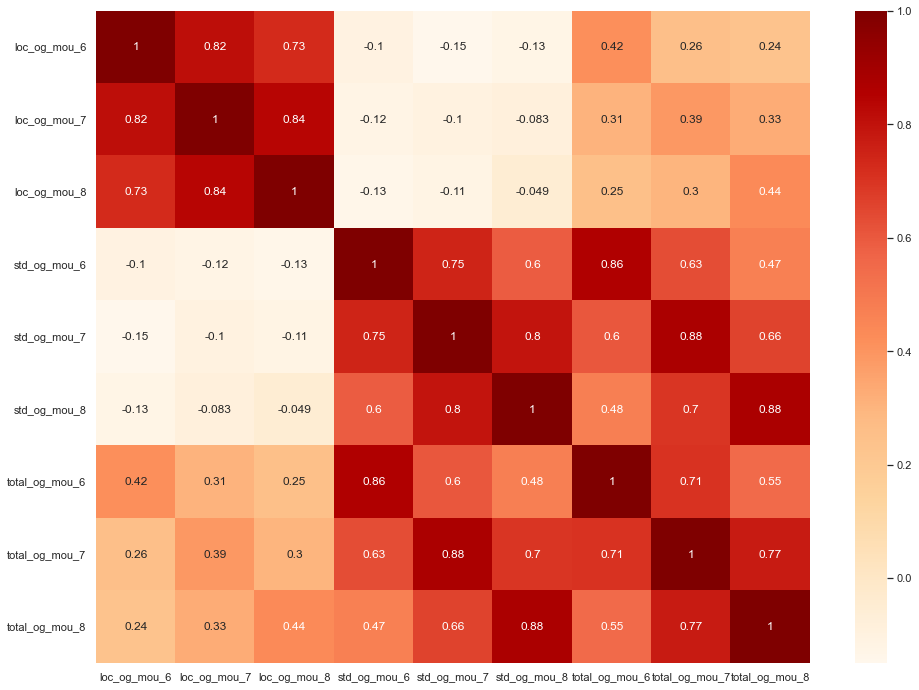

In [70]:
# plotting heatmap to compare correlation

plt.figure(figsize=(16,12))
sns.heatmap(data=hvc_data[cols_list].corr(),cmap="OrRd",annot=True)

In [71]:
# getting a columns related to total, standard and local incoming minutes of usage

cols_list = hvc_data.columns[hvc_data.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

<AxesSubplot:>

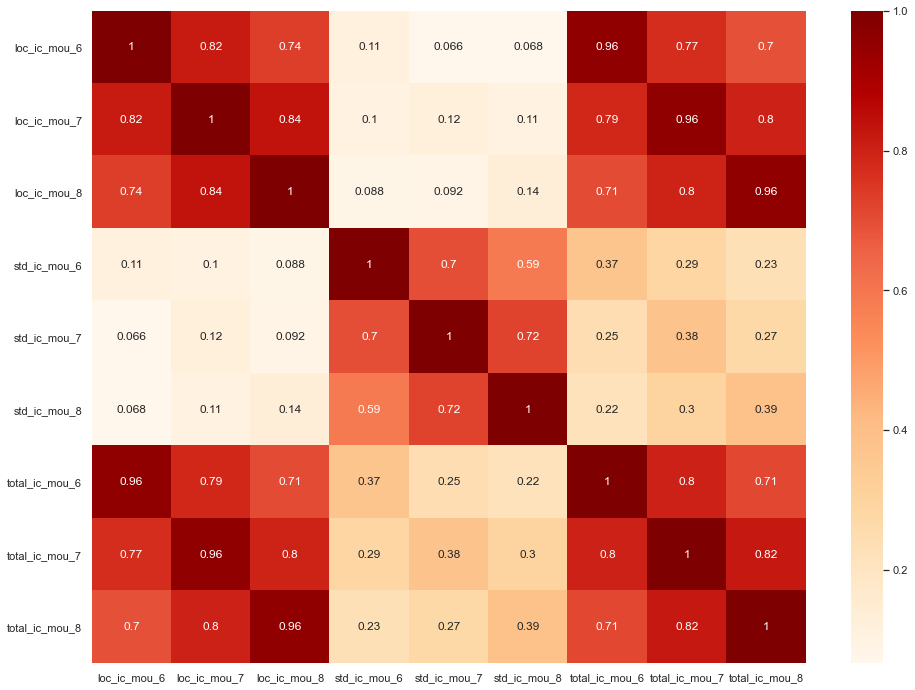

In [72]:
# plotting heatmap to compare correlation

plt.figure(figsize=(16,12))
sns.heatmap(data=hvc_data[cols_list].corr(),cmap="OrRd",annot=True)

# 1. Modelling

In [73]:
# importing all necessary libraries/packages

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [74]:
# class distribution in our dataset

round(hvc_data['churn'].value_counts()*100/len(hvc_data),2)

0    91.64
1     8.36
Name: churn, dtype: float64

- We can clearly see that there is class imbalance so we will have to use some ***Sampling Technique*** to make it balance dataset.

## Sampling the Dataset to get a Balance between churn and not churn

<img src="https://miro.medium.com/max/725/1*H6XodlitlGDl9YdbwaZLMw.png">

- We can choose to do either of Undersampling or Oversampling
- In this case we will proceed with doing Oversampling

In [75]:
# reseting index of hvc_data

hvc_data = hvc_data.reset_index(drop=True)
hvc_data.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803        34.31        32.33   
1     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
2     7001524846   378.721   492.223   137.362       413.69       351.03   
3     7002124215   514.453   597.753   637.760       102.41       132.11   
4     7000887461    74.350   193.897   366.966        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00         96.31        91.735          0.00           0.00   
1        52.29        453.43       567.160        325.91          16.23   
2        35.08         94.66        80.630        136.48           0.00   
3        85.14        757.93       896.680        983.39           0.00   
4        33.58         85.41        89.360        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             11.91             11.61              0.00             41.03   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             40.43              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         65.11        63.685          0.00              0.00   
1        422.16       533.910        255.79              4.30   
2        378.09       288.180         63.04            116.56   
3         97.04        94.090        129.74             97.93   
4        131.91       133.680        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              3.95             3.635   
1             23.29             12.01             49.89            31.760   
2            133.43             22.58             13.69            10.040   
3            125.94             61.79            665.36           808.740   
4              0.00              0.00              2.36             6.350   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00        

In [76]:
# copying hvc_data into data
data = hvc_data

# class count
class_count_0, class_count_1 = data['churn'].value_counts()

# Separate class
class_0 = data[data['churn'] == 0]
class_1 = data[data['churn'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (24575, 136)
class 1: (2243, 136)


Churn Distribution :
 1    24575
0    24575
Name: churn, dtype: int64


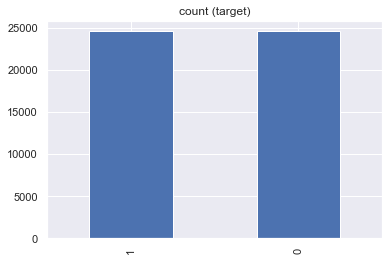

In [77]:
# performing oversampling on class '1'

class_1_over = class_1.sample(class_count_0, replace=True)

over_sampled_df = pd.concat([class_1_over, class_0], axis=0)

print("Churn Distribution :\n",over_sampled_df['churn'].value_counts())

# plot the count after over-sampeling
over_sampled_df['churn'].value_counts().plot(kind='bar', title='count (target)')

hvc_data = over_sampled_df

### Now we have a balanced dataset

## Train - Test Split

In [78]:
hvc_data.shape

(49150, 136)

In [79]:
# checking class distribution

hvc_data['churn'].value_counts()

1    24575
0    24575
Name: churn, dtype: int64

In [80]:
# creating X(input for our model) and y(output for our model) from our dataset

y = hvc_data['churn']
X = hvc_data.drop(columns=['churn'])

In [81]:
# performing train test split on X and y (in ratio of 70:30)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


In [82]:
# removing and storing mobile_number of each customer in train & test set to seperate Series

X_train_mobile = X_train.pop('mobile_number')
X_test_mobile = X_test.pop('mobile_number')

## Scaling

In [83]:
# Scaling our model input dataframe
# we are using standardization for scaling

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

## PCA

In [84]:
# creating PCA object and fitting our scaled model input dataframe with pca

pca = PCA(random_state=100)
pca.fit(X_train_scaled)

PCA(random_state=100)

In [85]:
# fetching pricipal components after fitting

pca.components_

array([[ 9.46763322e-02,  1.42842618e-01,  1.69842135e-01, ...,
         2.45367215e-03,  3.90786268e-02,  7.69387700e-02],
       [-9.13795104e-02, -8.86220854e-02, -1.54300961e-02, ...,
         5.54288345e-02,  6.34533196e-02,  7.94261564e-02],
       [ 1.95787686e-02,  1.45025034e-01,  1.85305724e-01, ...,
         6.39516118e-02,  1.63247779e-01,  1.90534800e-01],
       ...,
       [-1.31228029e-08,  2.93477628e-07, -8.00580285e-08, ...,
        -1.63099545e-08,  1.24256042e-08, -3.44125507e-08],
       [ 0.00000000e+00,  5.05964024e-18,  7.69593870e-17, ...,
        -8.53477898e-17,  1.92563486e-17, -6.68845808e-17],
       [ 0.00000000e+00, -4.07559008e-17, -1.29366323e-16, ...,
         1.05850854e-16, -1.06524510e-17,  2.14008122e-17]])

In [86]:
# fetching explained variance ratio 

pca.explained_variance_ratio_

array([1.08244483e-01, 1.00254748e-01, 5.47896245e-02, 4.17927183e-02,
       3.66438911e-02, 3.18660190e-02, 3.15970341e-02, 2.59381722e-02,
       2.21079007e-02, 2.11484416e-02, 2.03756359e-02, 1.88028027e-02,
       1.77281398e-02, 1.75198443e-02, 1.65305712e-02, 1.55871852e-02,
       1.42713218e-02, 1.36975109e-02, 1.32688079e-02, 1.16741103e-02,
       1.12259674e-02, 1.07096306e-02, 1.05541350e-02, 9.99608163e-03,
       9.91398345e-03, 9.85431390e-03, 9.32963644e-03, 8.86564996e-03,
       8.58725401e-03, 8.51795218e-03, 8.29158139e-03, 7.86179308e-03,
       7.81468539e-03, 7.50909796e-03, 7.36161563e-03, 7.16883782e-03,
       7.08097792e-03, 6.86227172e-03, 6.76686731e-03, 6.59684336e-03,
       6.44431502e-03, 6.34846105e-03, 6.18026652e-03, 6.06040057e-03,
       5.82700265e-03, 5.64678446e-03, 5.51353012e-03, 5.38457637e-03,
       5.25235001e-03, 5.09130821e-03, 5.05073793e-03, 4.58606749e-03,
       4.48867435e-03, 4.43886280e-03, 4.34878671e-03, 4.26776911e-03,
      

In [87]:
# generating cummulative sum for plotting explained variance in SCREE plot

var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

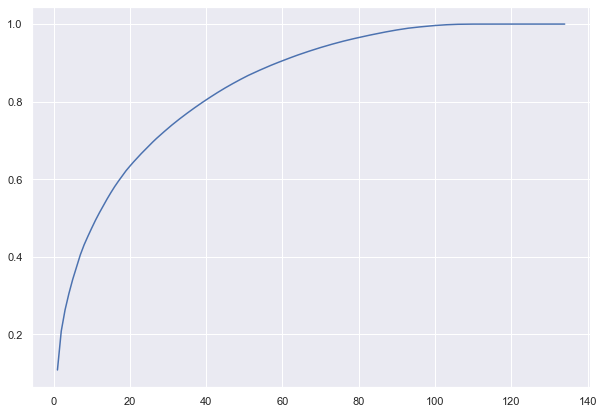

In [88]:
plt.figure(figsize=(10,7))
plt.plot(range(1,len(var_cumu)+1), var_cumu)

- From the plot it can be noticed that 70 PC are able to explain about 95% of variance in our training data
- NExt, we will create PCA with 70 Components

In [89]:
# creating PCA object and applying fit and transform to our scaled input dataframe to get newdata

pc2 = PCA(n_components=70, random_state=100)
newdata = pc2.fit_transform(X_train_scaled)

In [90]:
newdata.shape

(34405, 70)

In [91]:
# storing newdata into a DataFrame

df = pd.DataFrame(newdata, columns=range(0,newdata.shape[1]))
df.head()

0         1         2         3         4         5         6   \
0 -2.195913  1.493460  0.220242  2.259411  2.731873  0.619506 -0.533966   
1  0.399932  0.830600 -1.265856  1.592447  2.136653  0.813782  0.141636   
2 -1.585093 -2.618562 -1.582577 -0.768207  2.708262  0.096202  0.859692   
3 -2.314442  1.039140 -1.673058 -2.576114  5.772069 -1.672936  2.938587   
4  0.066002 -3.573847  0.262941  1.103938 -1.432817 -1.258874 -0.776186   

         7         8         9         10        11        12        13  \
0 -0.011106 -0.987077 -0.436111  0.096483  0.517943 -0.970858 -0.870809   
1 -0.433069 -0.452590 -0.061615  0.281288 -0.310577 -0.578177 -1.480808   
2  0.163952 -1.297532 -0.681361  0.260875  0.497278 -0.815554 -0.592839   
3 -1.725468 -0.912037  1.117843  2.327577  0.248500  4.325550  2.125311   
4 -0.273742 -0.313474 -1.303327 -0.365149  0.312725 -0.240358  0.124629   

         14        15        16        17        18        19        20  \
0 -0.007673 -0.267125 -0.640828  0.151792 -1.101578 -0.389134  0.569587   
1 -0.120176  0.056563  0.029450  0.325752 -0.821162 -1.426710  0.713618   
2 -0.859642  0.599230 -0.488844 -0.606478 -0.443675  0.574940 -0.466705   
3  0.267819 -0.152570 -0.305761 -3.027278 -0.255750 -0.636123 -2.308780   
4 -0.330906  0.197573  0.366016 -0.385495 -0.745894  1.685704  0.015688   

         21        22        23        24        25        26        27  \
0  0.582103 -0.381974 -1.810138  0.790347 -0.604997 -0.044768  1.012306   
1 -0.146513 -1.247131 -0.960146  0.785575 -0.374221 -0.425973  1.055743   
2  0.472359 -0.553024 -0.408521  0.626777 -0.028734  0.366881 -0.688691   
3  1.160615 -4.375355 -2.338185 -1.237976  1.200980  0.090799 -1.230802   
4  0.200651  0.598050 -0.112049  0.665217  0.156985  0.673279 -1.522395   

         28        29        30        31        32        33        34  \
0 -0.103798 -0.144564  0.575472 -0.423020  0.653005 -0.272673 -0.143404   
1  0.195882 -0.143363  0.656251 -0.502084 -0.382522 -0.175545  0.320936   
2  0.454921  0.297208  0.225050  0.187245  0.371792  0.166267 -0.296102   
3  5.809622 -2.895356 -0.055853 -0.221119  0.864662  0.118547  1.269216   
4  0.143413  0.222835  0.180120 -1.076523  0.827259  0.364474 -0.037733   

         35        36        37        38        39        40        41  \
0  0.188855  0.286313  0.175065  0.155486  0.642102 -0.340709 -0.734355   
1  0.038391  0.218641  0.132415 -0.192696  0.357030 -0.162216 -0.862509   
2  0.445399 -0.458569  0.483819  0.314169  0.201371  0.270318 -0.308426   
3  1.081427 -0.978263  1.787848  1.020584  0.434965 -0.215280 -0.299330   
4  0.335244 -0.060744  0.139617 -0.464660 -0.126994 -0.267848 -0.074124   

         42        43        44        45        46        47        48  \
0  0.077604 -0.123485 -0.074337  0.072288 -0.164831 -0.224776 -1.096156   
1  0.258284  0.189448 -0.177707 -0.399477 -0.246222  0.188436  0.700563   
2 -0.078004  0.215391 -0.009696  0.259137  0.392686 -0.265898 -0.801622   
3  0.899711 -0.455328  0.729274 -1.387329 -0.411540  0.839457 -0.158967   
4  0.385537 -0.048584  0.307766 -0.368836  0.074869  0.286140  0.081978   

         49        50        51        52        53        54        55  \
0 -0.125103  1.159621 -0.201544  0.717155  0.721694  1.348521  0.447442   
1 -0.591570  0.154586  0.260906  0.333089  0.188602  0.228677  0.393252   
2 -0.019220  0.407173  0.013706  0.450618  0.064629  0.533376  0.227737   
3 -0.822147 -3.834070 -0.060640 -1.884708 -0.484953 -1.116540  0.605887   
4  0.013985  0.093420 -0.022190 -0.009095 -0.033959 -0.264890  0.139054   

         56        57        58        59        60        61        62  \
0 -0.532165  0.866262  0.180394 -0.560106 -0.172392  0.126847 -0.562767   
1 -0.215904 -0.504543  0.232602  0.277264 -0.015113  0.856005  0.203674   
2 -0.438155  0.455221  0.031753 -0.330350 -0.143328  0.039270 -0.318628   
3  1.638226 -2.948783  1.184198  1.131844 -3.040730 -0.031034 -0.722374   
4  0.107746 -0.295365  0.0

In [92]:
# merging PC tranformed dataset(df) with target varaible(y_train)

df_final = pd.concat([df, y_train.reset_index(drop=True)], axis=1)

In [93]:
# peeping into our PC dataset

df_final.head()

0         1         2         3         4         5         6  \
0 -2.195913  1.493460  0.220242  2.259411  2.731873  0.619506 -0.533966   
1  0.399932  0.830600 -1.265856  1.592447  2.136653  0.813782  0.141636   
2 -1.585093 -2.618562 -1.582577 -0.768207  2.708262  0.096202  0.859692   
3 -2.314442  1.039140 -1.673058 -2.576114  5.772069 -1.672936  2.938587   
4  0.066002 -3.573847  0.262941  1.103938 -1.432817 -1.258874 -0.776186   

          7         8         9        10        11        12        13  \
0 -0.011106 -0.987077 -0.436111  0.096483  0.517943 -0.970858 -0.870809   
1 -0.433069 -0.452590 -0.061615  0.281288 -0.310577 -0.578177 -1.480808   
2  0.163952 -1.297532 -0.681361  0.260875  0.497278 -0.815554 -0.592839   
3 -1.725468 -0.912037  1.117843  2.327577  0.248500  4.325550  2.125311   
4 -0.273742 -0.313474 -1.303327 -0.365149  0.312725 -0.240358  0.124629   

         14        15        16        17        18        19        20  \
0 -0.007673 -0.267125 -0.640828  0.151792 -1.101578 -0.389134  0.569587   
1 -0.120176  0.056563  0.029450  0.325752 -0.821162 -1.426710  0.713618   
2 -0.859642  0.599230 -0.488844 -0.606478 -0.443675  0.574940 -0.466705   
3  0.267819 -0.152570 -0.305761 -3.027278 -0.255750 -0.636123 -2.308780   
4 -0.330906  0.197573  0.366016 -0.385495 -0.745894  1.685704  0.015688   

         21        22        23        24        25        26        27  \
0  0.582103 -0.381974 -1.810138  0.790347 -0.604997 -0.044768  1.012306   
1 -0.146513 -1.247131 -0.960146  0.785575 -0.374221 -0.425973  1.055743   
2  0.472359 -0.553024 -0.408521  0.626777 -0.028734  0.366881 -0.688691   
3  1.160615 -4.375355 -2.338185 -1.237976  1.200980  0.090799 -1.230802   
4  0.200651  0.598050 -0.112049  0.665217  0.156985  0.673279 -1.522395   

         28        29        30        31        32        33        34  \
0 -0.103798 -0.144564  0.575472 -0.423020  0.653005 -0.272673 -0.143404   
1  0.195882 -0.143363  0.656251 -0.502084 -0.382522 -0.175545  0.320936   
2  0.454921  0.297208  0.225050  0.187245  0.371792  0.166267 -0.296102   
3  5.809622 -2.895356 -0.055853 -0.221119  0.864662  0.118547  1.269216   
4  0.143413  0.222835  0.180120 -1.076523  0.827259  0.364474 -0.037733   

         35        36        37        38        39        40        41  \
0  0.188855  0.286313  0.175065  0.155486  0.642102 -0.340709 -0.734355   
1  0.038391  0.218641  0.132415 -0.192696  0.357030 -0.162216 -0.862509   
2  0.445399 -0.458569  0.483819  0.314169  0.201371  0.270318 -0.308426   
3  1.081427 -0.978263  1.787848  1.020584  0.434965 -0.215280 -0.299330   
4  0.335244 -0.060744  0.139617 -0.464660 -0.126994 -0.267848 -0.074124   

         42        43        44        45        46        47        48  \
0  0.077604 -0.123485 -0.074337  0.072288 -0.164831 -0.224776 -1.096156   
1  0.258284  0.189448 -0.177707 -0.399477 -0.246222  0.188436  0.700563   
2 -0.078004  0.215391 -0.009696  0.259137  0.392686 -0.265898 -0.801622   
3  0.899711 -0.455328  0.729274 -1.387329 -0.411540  0.839457 -0.158967   
4  0.385537 -0.048584  0.307766 -0.368836  0.074869  0.286140  0.081978   

         49        50        51        52        53        54        55  \
0 -0.125103  1.159621 -0.201544  0.717155  0.721694  1.348521  0.447442   
1 -0.591570  0.154586  0.260906  0.333089  0.188602  0.228677  0.393252   
2 -0.019220  0.407173  0.013706  0.450618  0.064629  0.533376  0.227737   
3 -0.822147 -3.834070 -0.060640 -1.884708 -0.484953 -1.116540  0.605887   
4  0.013985  0.093420 -0.022190 -0.009095 -0.033959 -0.264890  0.139054   

         56        57        58        59        60        61        62  \
0 -0.532165  0.866262  0.180394 -0.560106 -0.172392  0.126847 -0.562767   
1 -0.215904 -0.504543  0.232602  0.277264 -0.015113  0.856005  0.203674   
2 -0.438155  0.455221  0.031753 -0.330350 -0.143328  0.039270 -0.318628   
3  1.638226 -2.948783  1.184198  1.131844 -3.040730 -0.031034 -0.722374   
4  0.107746 -0.295365  0.06

C:\Users\NAVIN\anaconda3_\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


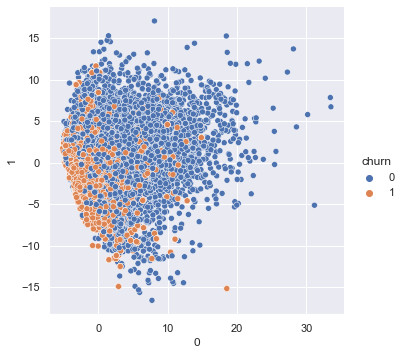

In [94]:
# scatter plot of PC1 and PC2

sns.pairplot(data=df_final, x_vars=0, y_vars=1, hue = "churn", size=5)

- A Scatter plot between PC1 and PC2 can be seen above. 
- We can almost see the distribution of churn and not-churn in the plot above

## PCA and Logistic Regression

In [95]:
# create pipeline of Scaler, PCA and Logistic Regression

N_PC = 70
pipe = [("scaler", StandardScaler()),
         ("pca", PCA(n_components=N_PC, random_state=100)),
         ("lr", LogisticRegression())
        ]
pipeline = Pipeline(pipe)

# fitting pipeline with X_train and y_train

pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=70, random_state=100)),
                ('lr', LogisticRegression())])

In [96]:
# getting accuracy score of our PCA with logisticRegression model

pipeline.score(X_train, y_train)

0.8250254323499492

In [97]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confision Matrix : \n",cm)


# check precision and recall
print("Recall :",round(cm[1][1]/(cm[1][1]+cm[1][0]),2))
print("Precision :",round(cm[1][1]/(cm[1][1]+cm[0][1]),2))

# f1 score
print("F1 Score :",f1_score(y_test,y_pred))

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC :", round(roc_auc_score(y_test, y_pred_prob),3))

Confision Matrix : 
 [[6017 1426]
 [1151 6151]]
Recall : 0.84
Precision : 0.81
F1 Score : 0.8268028765374018
AUC : 0.899


#### We have pretty good result after performing LogisticRegression over PCA

## Hyperparameter tuning - PCA and Logistic Regression

In [98]:

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", PCA(random_state=100)),
         ("logistic", LogisticRegression())
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter setting
params = {'pca__n_components': [65,70,75], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, 
                     cv=folds, 
                     param_grid=params, 
                     scoring='roc_auc', 
                     n_jobs=-1, 
                     verbose=1)


In [99]:
# fit model

model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   27.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(random_state=100)),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [65, 70, 75]},
             scoring='roc_auc', verbose=1)

In [100]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8985566390952876
Best hyperparameters:  {'logistic__penalty': 'l2', 'pca__n_components': 75}


In [101]:
# predict churn on test data
y_pred = model.best_estimator_.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confision Matrix : \n",cm)


# check precision and recall
print("Recall :",round(cm[1][1]/(cm[1][1]+cm[1][0]),2))
print("Precision : ",round(cm[1][1]/(cm[1][1]+cm[0][1]),2))


# f1 score
print("F1 Score :",f1_score(y_test,y_pred))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC :", round(roc_auc_score(y_test, y_pred_prob),3))

Confision Matrix : 
 [[6011 1432]
 [1144 6158]]
Recall : 0.84
Precision :  0.81
F1 Score : 0.8270212194466827
AUC : 0.899


- After hyperparameter tuning we have a little increment in model performance (F1 Score).
- We can consider this model as our final model for PCA with LogisticRegression

In [102]:
# storing above model into seperate variable for future reference

final_model = model

# Random Forest

In [103]:
# random forest
forest = RandomForestClassifier(random_state=100, n_jobs = -1, max_depth=2)

# hyperparameter setting
# Note : I am not using many hyperparamters due to resources contraints
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}
# we can use many other hyperparameters like min_samples_split, min_samples_leaf, n_estimators, max_depth etc..

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=forest, 
                     cv=folds, param_grid=params, 
                     scoring='roc_auc', 
                     n_jobs=-1, 
                     verbose=1)

In [104]:
# fit model

model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(max_depth=2, n_jobs=-1,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [105]:
# print best hyperparameters

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9060903554425452
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [106]:
# predict churn on test data
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confision Matrix : \n",cm)

# check precision and recall
print("Recall :",round(cm[1][1]/(cm[1][1]+cm[1][0]),2))
print("Precision : ",round(cm[1][1]/(cm[1][1]+cm[0][1]),2))

# f1 score
print("F1 Score :",f1_score(y_test,y_pred))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC :", round(roc_auc_score(y_test, y_pred_prob),3))

Confision Matrix : 
 [[6852  591]
 [2149 5153]]
Recall : 0.71
Precision :  0.9
F1 Score : 0.7899739383719148
AUC : 0.904


- In case of Random Forest we are able to achieve ~0.79 F1 score.
- AS we are getting better scores in LogisticRegression we will proceed ahead with LogisticRegression as our final model.

- Note : We have not performed PCA with RandomForest because PCA is a Linear Combination Model and it is prefered to use Linear Model on PCA so we have only perform LogisticRegression on PCA as it is a Linear Model.

#### Predicting customers that will churn 

In [107]:
predictions = final_model.predict(X_test)

temp = pd.DataFrame()
temp['Mobile Number'] = X_test_mobile.reset_index(drop=True)
temp['Churn True'] = y_test.reset_index(drop=True)
temp['Churn Prediction'] = pd.Series(predictions)
temp

Mobile Number  Churn True  Churn Prediction
0         7002025785           1                 1
1         7001851265           0                 0
2         7002232243           0                 0
3         7002278265           1                 1
4         7002399544           1                 1
5         7001512128           0                 0
6         7001173443           1                 0
7         7000797560           0                 0
8         7000584025           0                 0
9         7001293807           1                 1
10        7001061400           0                 0
11        7002081128           1                 1
12        7001668171           0                 0
13        7000654550           0                 0
14        7000838781           1                 1
15        7002310711           0                 1
16        7001730587           0                 0
17        7001703187           0                 0
18        7001560610           1                 0
19        7001558322           1                 0
20        7001082144           1                 1
21        7000769097           0                 0
22        7000082507           1                 0
23        7000603925           1                 1
24        7001746359           0                 0
25        7000089184           0                 0
26        7000747101           1                 1
27        7000017020           0                 0
28        7000175867           1                 1
29        7000236767           1                 1
30        7000929376           1                 1
31        7002144204           0                 0
32        7001687724           0                 1
33        7001704903           0                 1
34        7000382753           1                 0
35        7001988547           1                 1
36        7000087430           0                 0
37        7000403460           0                 0
38        7000968209           0                 0
39        7000822468           1                 1
40        7001231057           1                 0
41        7000041888           1                 1
42        7001248320           1                 0
43        7000516484           0                 0
44        7001116604           0                 0
45        7001775313           1                 0
46        7001370484           0                 0
47        7002258903           0                 0
48        7001464485           0                 0
49        7000417215           0                 0
50        7001325361           1                 1
51        7000342087           1                 1
52        7002233186           1                 0
53        7001027295           0                 0
54        7000857520           1                 0
55        7001749082           1                 1
56        7000191293           0                 1
57        7002196923           0                 1
58        7000421521           0                 0
59        7002084383           1                 1
60        7001762332           0                 0
61        7001448943           1                 0
62        7000095494           1                 1
63        7000572885           0                 0
64        7002276986           1                 0
65        7001222468           0                 0
66        7002323930           0                 0
67        7001734710           1                 1
68        7002188194           0                 0
69        7000481557           0                 0
70        7000275913           0                 0
71        7001240581           1                 1
72        7001873312           0                 0
73        7000609416           1                 1
74        7000861645           0                 0
75        7001168962           0                 1
76        7000826060           0                 1
77        7002310213         

# 2. Choosing best features

## a. Random Forest

In [108]:
# running a random forest model on train data

max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print('max_features :',max_features)

rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_depth=2,
                                  max_features=max_features, 
                                  min_samples_split=20, 
                                  min_samples_leaf=10,
                                  oob_score=True, 
                                  random_state=100, 
                                  verbose=1,
                                 n_jobs=-1)

max_features : 12


In [109]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


RandomForestClassifier(max_depth=2, max_features=12, min_samples_leaf=10,
                       min_samples_split=20, n_jobs=-1, oob_score=True,
                       random_state=100, verbose=1)

In [110]:
# OOB score
rf_model.oob_score_

0.8186019473913675

In [111]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confision Matrix : \n",cm)

# check sensitivity and specificity

# check precision and recall
print("Recall :",round(cm[1][1]/(cm[1][1]+cm[1][0]),2))
print("Precision : ",round(cm[1][1]/(cm[1][1]+cm[0][1]),2))


# f1 score
print("F1 Score :",f1_score(y_test,y_pred))

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC :", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Confision Matrix : 
 [[6571  872]
 [1874 5428]]
Recall : 0.74
Precision :  0.86
F1 Score : 0.7981179238347301
AUC : 0.9


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


## Feature Importances

In [112]:
# predictors
features = X_train.columns

# feature_importance
importance = rf_model.feature_importances_

# creating dataframe for features and it's importance
feature_imp = pd.DataFrame()
feature_imp['Features'] = pd.Series(features)
feature_imp['Importance'] = round(pd.Series(importance) * 100,2)

feature_imp = feature_imp.sort_values(by='Importance',ascending=False).reset_index(drop=True)
feature_imp

Features  Importance
0        total_ic_mou_8       14.17
1                arpu_8        8.52
2            amt_data_8        8.34
3        total_og_mou_8        7.55
4      loc_ic_t2m_mou_8        5.84
5      loc_og_t2m_mou_8        5.67
6    last_day_rch_amt_8        5.40
7      loc_ic_t2t_mou_8        4.64
8          loc_og_mou_8        4.45
9        max_rech_amt_8        4.29
10            fb_user_8        3.26
11      max_rech_data_8        2.47
12         loc_ic_mou_8        2.16
13        roam_ic_mou_8        1.84
14     loc_og_t2t_mou_8        1.79
15     std_ic_t2f_mou_8        1.56
16        roam_og_mou_8        1.42
17           aug_vbc_3g        1.42
18         spl_og_mou_8        1.41
19     loc_ic_t2f_mou_8        1.30
20         offnet_mou_8        1.28
21          vol_2g_mb_8        1.22
22     night_pck_user_8        1.17
23     total_rech_num_8        1.11
24         std_ic_mou_8        1.02
25     std_ic_t2t_mou_8        0.91
26     loc_og_t2f_mou_8        0.87
27          onnet_mou_8        0.84
28          vol_3g_mb_8        0.74
29         monthly_2g_8        0.53
30     loc_ic_t2f_mou_7        0.44
31     std_og_t2m_mou_8        0.37
32     std_ic_t2m_mou_8        0.37
33         loc_og_mou_7        0.29
34     loc_og_t2m_mou_7        0.26
35            fb_user_7        0.22
36         std_og_mou_8        0.14
37          onnet_mou_7        0.11
38         std_og_mou_6        0.11
39       total_ic_mou_6        0.09
40       total_ic_mou_7        0.09
41       max_rech_amt_7        0.07
42         std_og_mou_7        0.06
43           sep_vbc_3g        0.06
44          ic_others_8        0.04
45         spl_ic_mou_8        0.04
46         offnet_mou_7        0.02
47      max_rech_data_6        0.01
48          onnet_mou_6        0.01
49       total_og_mou_7        0.01
50          vol_3g_mb_7        0.00
51          sachet_2g_8        0.00
52     total_rech_num_7        0.00
53         monthly_3g_6        0.00
54     total_rech_num_6        0.00
55         monthly_3g_7        0.00
56            fb_user_6        0.00
57          ic_others_7        0.00
58       max_rech_amt_6        0.00
59          ic_others_6        0.00
60         monthly_3g_8        0.00
61          sachet_3g_6        0.00
62          sachet_3g_7        0.00
63         isd_ic_mou_8        0.00
64         isd_ic_mou_7        0.00
65          sachet_2g_7        0.00
66         monthly_2g_7        0.00
67          sachet_2g_6        0.00
68      max_rech_data_7        0.00
69          vol_3g_mb_6        0.00
70     night_pck_user_7        0.00
71          vol_2g_mb_7        0.00
72          vol_2g_mb_6        0.00
73          sachet_3g_8        0.00
74           jul_vbc_3g        0.00
75           jun_vbc_3g        0.00
76     night_pck_user_6        0.00
77         isd_ic_mou_6        0.00
78           amt_data_6        0.00
79   last_day_rch_amt_7        0.00
80         monthly_2g_6        0.00
81   last_day_rch_amt_6        0.00
82           amt_data_7        0.00
83                  aon        0.00
84               arpu_6        0.00
85         spl_ic_mou_7        0.00
86         isd_og_mou_6        0.00
87     std_og_t2f_mou_7        0.00
88     std_og_t2f_mou_6        0.00
89     std_og_t2m_mou_7        0.00
90     std_og_t2m_mou_6        0.00
91     std_og_t2t_mou_8        0.00
92     std_og_t2t_mou_7        0.00
93     std_og_t2t_mou_6        0.00
94         loc_og_mou_6        0.00
95     loc_og_t2c_mou_8        0.00
96     loc_og_t2c_mou_7        0.00
97     loc_og_t2c_mou_6        0.00
98     loc_og_t2f_mou_7        0.00
99     loc_og_t2f_mou_6        0.00
100    loc_og_t2m_mou_6        0.00
101    loc_og_t2t_mou_7        0.00
102    loc_og_t2t_mou_6        0.00
103       roam_og_mou_7        0.00
104       roam_og_mou_6        0.00
105       roam_ic_mou_7        0.00
106       roam_ic_mou_6        0.00
107        offnet_mou_6        0.00
108    std_og_t2f_mou_8        0.00
109        isd_og_mou_7        0.00
110        spl_ic_m

In [113]:
# considering top 10 features for further analysing using LogisticRegression

top_features = feature_imp.Features.values[:10]
top_features

array(['total_ic_mou_8', 'arpu_8', 'amt_data_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'last_day_rch_amt_8',
       'loc_ic_t2t_mou_8', 'loc_og_mou_8', 'max_rech_amt_8'], dtype=object)

<AxesSubplot:xlabel='Importance', ylabel='Features'>

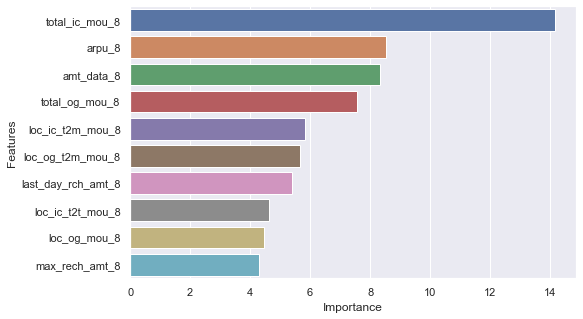

In [114]:
temp = feature_imp[:10]

plt.figure(figsize=(8,5))
sns.barplot(data=temp,x='Importance',y='Features')

<AxesSubplot:>

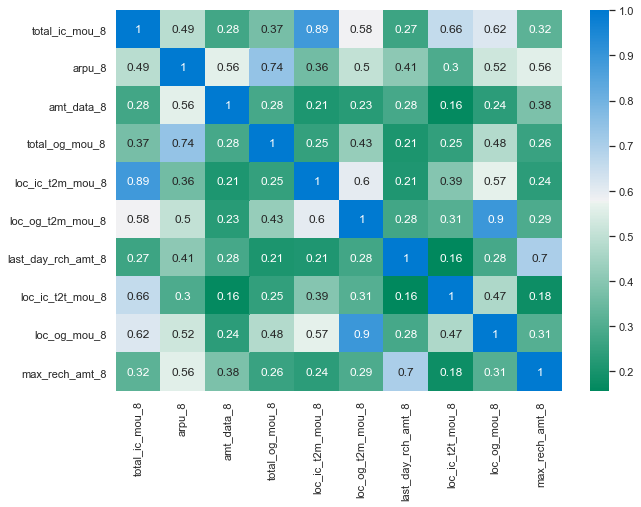

In [115]:
# analysing correlation between top features using heatmap

plt.figure(figsize=(10,7))
temp = X_train[top_features].corr()
mycmap = sns.diverging_palette(150, 250, s=100, center="light", as_cmap=True)
sns.heatmap(data=temp,annot=True,cmap=mycmap)

## b. Logistic Regression Model with only top features

In [116]:
# creating X and y for LR

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [117]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression())
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter setting
params = {'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=logistic, 
                     cv=folds, 
                     param_grid=params, 
                     scoring='roc_auc', 
                     n_jobs=-1, 
                     verbose=1)

In [118]:

# fit model
model.fit(X_train_top, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1, param_grid={'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [119]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8781273447828057
Best hyperparameters:  {'logistic__penalty': 'l2'}


In [120]:
# predict churn on test data
y_pred = model.predict(X_test_top)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# check precision and recall
print("Recall :",round(cm[1][1]/(cm[1][1]+cm[1][0]),2))
print("Precision : ",round(cm[1][1]/(cm[1][1]+cm[0][1]),2))


# f1 score
print("F1 Score :",f1_score(y_test,y_pred))

# check area under curve
y_pred_prob = model.predict_proba(X_test_top)[:, 1]
print("AUC :", round(roc_auc_score(y_test, y_pred_prob),2))

[[5480 1963]
 [1233 6069]]
Recall : 0.83
Precision :  0.76
F1 Score : 0.7915742793791574
AUC : 0.88


In [121]:
# fetching best LR model from pipeline

logistic_model = model.best_estimator_.named_steps['logistic']

In [122]:
# fetching intercept from best LR model

list(logistic_model.intercept_)

[-0.36929882618155957]

In [123]:
# Fetching Coefficients of each features from Best LR model

list(logistic_model.coef_[0])

[-2.861611904586063,
 0.45523051341723586,
 -1.4671566940599643,
 -0.1275240293494735,
 1.1616321206178548,
 -0.23465616595438335,
 -0.2030285185626289,
 0.6238918780060859,
 -0.09187697840591566,
 0.06670314987342123]

In [124]:
# creating a DF of features and it's coefficients

features_coef = pd.DataFrame()
features_coef['Features'] = pd.Series(['Intercept'] + list(X_train_top.columns))
features_coef['Coefficient'] = pd.Series(list(logistic_model.intercept_) + list(logistic_model.coef_[0]))
features_coef

Features  Coefficient
0            Intercept    -0.369299
1       total_ic_mou_8    -2.861612
2               arpu_8     0.455231
3           amt_data_8    -1.467157
4       total_og_mou_8    -0.127524
5     loc_ic_t2m_mou_8     1.161632
6     loc_og_t2m_mou_8    -0.234656
7   last_day_rch_amt_8    -0.203029
8     loc_ic_t2t_mou_8     0.623892
9         loc_og_mou_8    -0.091877
10      max_rech_amt_8     0.066703

### The above DataFrame shows the Top 10 most important features in determining whether a customer will churn or not.

# <font color='green'>Business Insights</font>

- Telecom company needs to pay attention to the total_ic_mou_8 value for each high value customer. If the customer's total_ic_mou_8 (total incoming minutes of usage in 8th month) usage decreases that means there are more chances that the customer will churn. So telecom company need to give some attractive offers to such customers.
<hr>
- If loc_ic_t2m_mou_8 (local incoming calls from other operator (mobile) minutes of usage in 8th month) value increases for a customer, means customer is more engaging with other operator users and is more likely to churn. Such customer should be rewarded with appropriate cashback and discounts in recharge packs/coupons.
<hr>
- Total recharge amount for June and July is also a good indicator for churn prediction. If this value decreases we need to take more care of such customer.
<hr>
- To look into all of the issues stated above, it is required that the telecom company collects customer queries and complaints and work on their services according to the needs of customers.